# QWERTY effect for Amazon review text

Julian McAuley Amazon Dataset http://cseweb.ucsd.edu/~jmcauley/
- Julian McAuley, Rahul Pandey, and Jure Leskovec. Inferring networks of substitutable and complementary products. In Proceedings of the International Conference on Knowledge Discovery and Data Mining, pages 785–794, 2015.
- Julian McAuley, Christopher Targett, Qinfeng Shi, and Anton van den Hengel. Image-based recommendations on styles and substitutes. In Proceedings of the International Conference on Research and Development in Information Retrieval, pages 43–52, 2015.

In [1]:
source("EncodingFunctions.R")
options(warn=-1)
suppressMessages(library(robust, quietly=TRUE))
suppressMessages(library(stargazer, quietly=TRUE))
suppressMessages(library(gplots, quietly=TRUE))

dsname <- "Amazon"
msg <- "Amazon Reviews"
runsfolder <- paste(dsname, "rundata", sep="-")

In [2]:
load(paste(dsname, "df.RData", sep="/"))
nameLen <- df$R+df$L
lin0 <- lm(V~nameLen, data=df)
save(lin0,file=paste(runsfolder, "lin0.RData", sep="/"))
lin1 <- lm(V~R+L, data=df)
save(lin1,file=paste(runsfolder, "lin1.RData", sep="/"))
lin2 <- lm(V~R*L, data=df)
save(lin2,file=paste(runsfolder, "lin2.RData", sep="/"))

In [3]:
stargazer(lin0, lin1, lin2, style="asr", digits=6, keep.stat=c("adj.rsq", "n"), model.numbers=F, 
          omit.table.layout="dm", column.labels=c("Model 1", "Model 2", "Model 3"), 
          title=paste("Regression results for", msg), digit.separator=".", type="text")


Regression results for Amazon Reviews
--------------------------------------------------
              Model 1      Model 2      Model 3   
--------------------------------------------------
nameLen     -0.000123***                          
R                        0.000864***  0.000863*** 
L                        -0.000840*** -0.000940***
R:L                                   0.0000001***
Constant    4.096511***  4.095907***  4.110348*** 
N             971.026      971.026      971.026   
Adjusted R2   0.001336     0.001500     0.001912  
--------------------------------------------------
*p < .05; **p < .01; ***p < .001                  


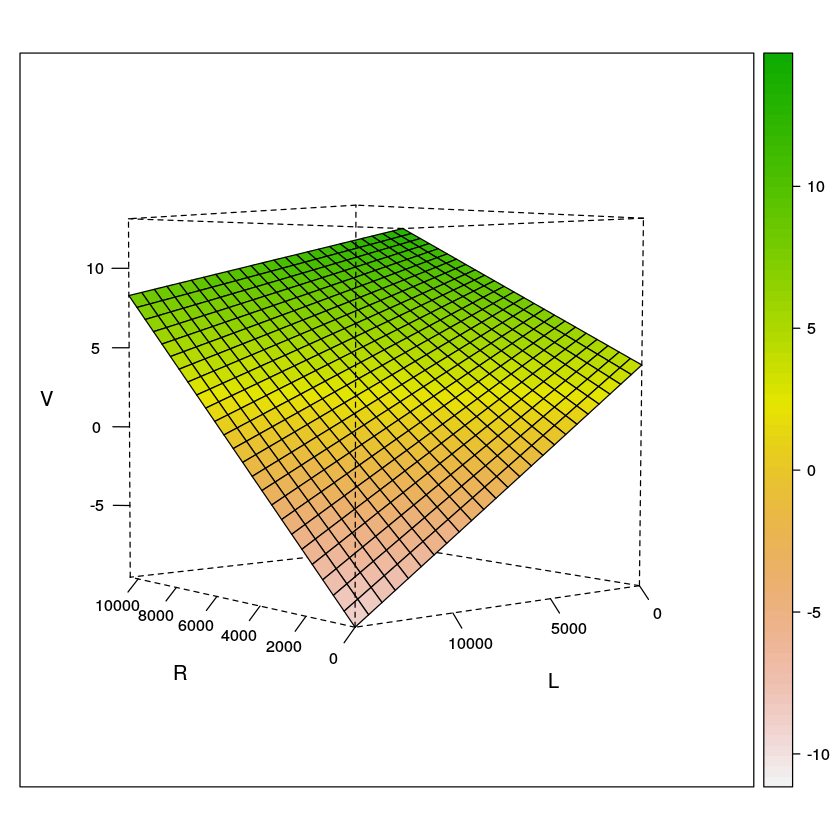

In [4]:
load(paste(dsname, "df.RData", sep="/"))
load(paste(runsfolder, "lin2.RData", sep="/"))


cscale <- rev(cm.colors(1000))

df3D <- data.frame(V=NULL, R=NULL, L=NULL)

Rrange <- seq(0,max(df$R), length.out=25)
Lrange <- seq(0,max(df$L), length.out=25)

for (r in Rrange)
  {
    for (l in Lrange)
      {
        v <- predict(lin2, data.frame(R=r, L=l))
        df3D <- rbind(df3D, data.frame(V=v, R=r, L=l))
      }
  }

cscale <- rev(terrain.colors(24*100)) # from -10 to 14
clims <-round(range(df3D$V))*100
library(lattice)
wireframe(V ~ R*L, data = df3D,
          drape = TRUE,
          colorkey = TRUE,
          col.regions=cscale[1001+seq(clims[1],clims[2])],
          screen=list(x = -95, y = 130, z=-4),cex.axis=1, cex.lab=2, scales=list(arrows=FALSE), par.box=list(lty=2))

In [ ]:
rndLinModels(df, runsfolder, nrep=10000, verbose=FALSE)
bootLinModels(df, runsfolder, nrep=10000, verbose=FALSE)

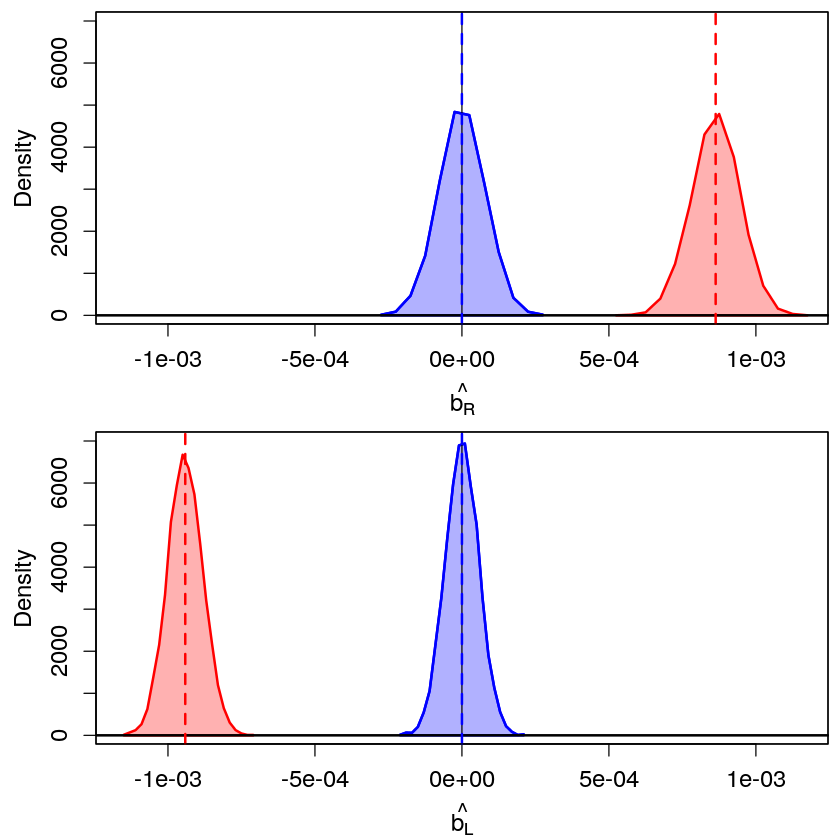

In [5]:
suppressMessages(require(Hmisc, quietly = T))

par(mar=c(4,4,0.5,0.5))
par(mfrow=c(2,1))
load(paste(runsfolder, "/RndEsts1.RData", sep=""))
load(paste(runsfolder, "/RndEsts2.RData", sep=""))
load(paste(runsfolder, "/Boot1.RData", sep=""))
load(paste(runsfolder, "/Boot2.RData", sep=""))

xlims <- range(c(rests1,bests1,rests2,bests2))
hr1 <- hist(rests1, plot=F, breaks=15)
hb1 <- hist(bests1, plot=F, breaks=20)
hr2 <- hist(rests2, plot=F, breaks=15)
hb2 <- hist(bests2, plot=F, breaks=20)
  
ylims <- c(max(c(hr1$density,hr2$density,hb1$density,hb2$density))*0.01,
           max(c(hr1$density,hr2$density,hb1$density,hb2$density)))
  
plot(hr1$mids, hr1$density, col="blue", type="l", xlim=xlims,ylim=ylims, xlab="", ylab="", lwd=2, cex.axis=1.2) 
polygon(x=c(min(hr1$mids),hr1$mids,max(hr1$mids)),  y = c(0,hr1$density ,0), col=rgb(0,0,1,0.3), border="blue", lwd=2)
polygon(x=c(min(hb1$mids),hb1$mids,max(hb1$mids)),  y = c(0,hb1$density ,0), col=rgb(1,0,0,0.3), border="red", lwd=2)
abline(h=0, lwd=2)
abline(v=0, lty=1, col="black", lwd=1)
abline(v=mean(bests1), col="red", lwd=2, lty=2)
abline(v=mean(rests1), col="blue", lty=2, lwd=2)
mtext(side=1, line=3, expression(hat(b[R])), cex=1.2)
mtext(side=2, line=2.5, "Density", cex=1.2)
box()


plot(hr2$mids, hr2$density, col="blue", type="l", xlim=xlims,ylim=ylims, xlab="", ylab="", lwd=2, cex.axis=1.2) 
polygon(x=c(min(hr2$mids),hr2$mids,max(hr2$mids)),  y = c(0,hr2$density ,0), col=rgb(0,0,1,0.3), border="blue", lwd=2)
polygon(x=c(min(hb2$mids),hb2$mids,max(hb2$mids)),  y = c(0,hb2$density ,0), col=rgb(1,0,0,0.3), border="red", lwd=2)
abline(h=0, lwd=2)
abline(v=0, lty=1, col="black", lwd=1)
abline(v=mean(bests2), col="red", lwd=2, lty=2)
abline(v=mean(rests2), col="blue", lty=2, lwd=2)
mtext(side=1, line=3, expression(hat(b[L])), cex=1.2)
mtext(side=2, line=2.5, "Density", cex=1.2)
box()